### Loading dataset

In [217]:
import json

f = open('dataset_08_09_filtered.json',"r")
data = json.loads(f.read())

### Converting dataframe

In [218]:
import pandas as pd 
df = pd.DataFrame(data)
df.head()

,full_text,created_at,retweeted,hashtags
0,The NHS Trust in charge of Belmarsh prison whe...,1596240000000,False,[#covid]
1,The NMT ASAP Office would like to remind you t...,1596240009000,False,"[#nmtasap, #washyourhands]"
2,@WhiteHouse This would be interesting. #COVID ...,1596240009000,False,[#covid]
3,How an overnight camp in Georgia went awry in ...,1596240024000,False,[#covid19]
4,If kids can infect other kids with #COVID19 at...,1596240026000,False,[#covid19]


In [219]:
## data describtion
## this command output statistical information of the columns which contains only integer value.
## in this dataset only column named created_at has integer values, so the output is as below
df.describe()

,created_at
count,5.481480e+05
mean,1.598918e+12
std,1.530599e+09
min,1.596240e+12
25%,1.597638e+12
50%,1.598944e+12
75%,1.600262e+12
max,1.601510e+12


### Checking missing values

In [220]:
## This command checks non-null and null values in the dataset.
## in our dataset there is no non-null or missed value in all columns
"""From this command we can see that, ful_text column contains object which is string data type
created_at column contains integer data type values
retweeted colums contains boolean data type values in this dataset has only False 
hashtags contains object which is string data type
"""

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548148 entries, 0 to 548147
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   full_text   548148 non-null  object
 1   created_at  548148 non-null  int64 
 2   retweeted   548148 non-null  bool  
 3   hashtags    548148 non-null  object
dtypes: bool(1), int64(1), object(2)
memory usage: 17.3+ MB


In [221]:
## This command also checks non-null and null values in the dataset.
## in our dataset there is no non-null or missed value in all columns
## Other method for cheking missing values in the dataset.

df.isnull().count()

full_text     548148
created_at    548148
retweeted     548148
hashtags      548148
dtype: int64

##### The cell below shows the visualization of the dataset feature by feature.

<AxesSubplot:>

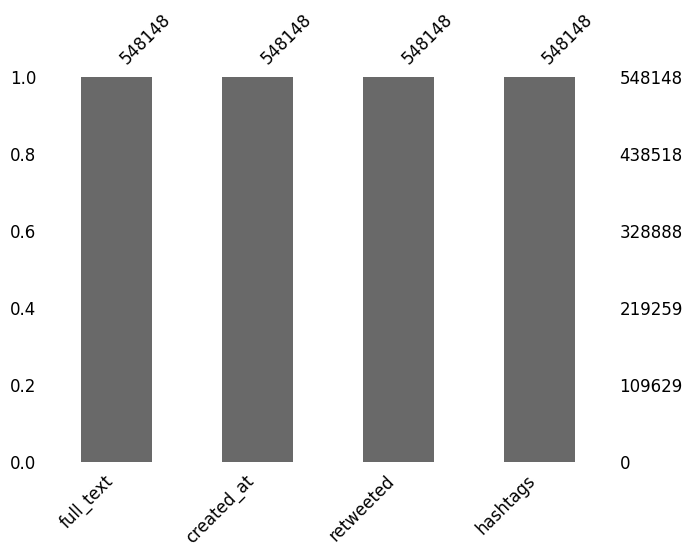

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mso

plt.figure(figsize=(16,5))
ax_train = plt.subplot(1,2,2)
mso.bar(df,ax=ax_train,fontsize = 12)

### This diagram shows that all columns has the same number of examples
### In other words the dataset has 548148 examples

In [223]:
### We then remove non alphanumeric characters as well as converting to all lower case from the text.

import re
def clean_txt(text):
    text = re.sub("'", "", text)
    text = re.sub("(\\W)+", " ", text)
    text = text.lower()
    return text

df['full_text']=df['full_text'].apply(clean_txt)

C:\Users\com\anaconda3\envs\tf_gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='word_count'>

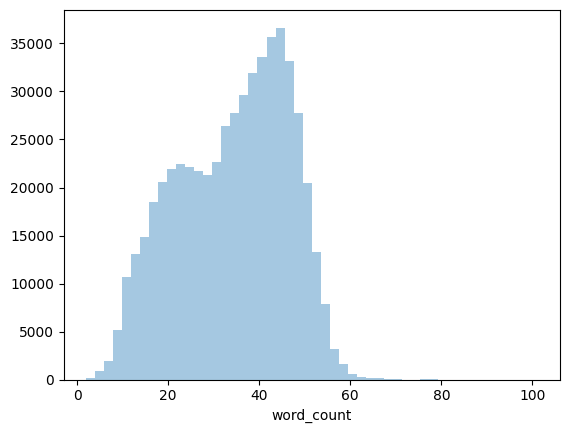

In [224]:
"""
We use dataset to perform exploratory analysis. 
First we want to look at the word count for each 
news.

The diagram shows that each news includes the words from 1 to 80 words.
And most news contains words from 10 to 55

"""

df['word_count'] = [len(s.split()) for s in df['full_text']]

sns.distplot(df['word_count'], kde=False, rug=False)

#### For classification or prediction tasks, the hashtags column will be not important. However we just do some analysis for this column.

In [225]:
"""
Now we get all hashtags from the hastags column
and counts how many hastags have been used.

hastags column has 1716688 hashtags

"""

unpacked_list_row = []

unpacked_dict = {}
for i in df['hashtags']:
    for j in i:
        unpacked_list_row.append(j)
        
print(len(unpacked_list_row))

1716688


In [226]:
## Now we sort the hastags for full dataset 

unpacked_list = []
for info in set(unpacked_list_row):
    unpacked_list.append([info, unpacked_list_row.count(info)])

unpacked_list = sorted(unpacked_list, key=lambda x: x[1], reverse=True)

In [227]:
"""
Now we need to classify hashtags depending on their frequency in the tweets
and we gaet top 15 hastags that used frequenly
"""

def make_info(x):
    info_list = []
    for z in range(int(x[1])):
        info_list.append(x[0])
    return info_list

info_list = []
for z in unpacked_list[:15]:
    info_list += make_info(z)


info_dict = {"Hashtags": info_list}
info_df = pd.DataFrame(info_dict)

In [228]:
"""
Now we can count number of hashtags of top-15 for the all dataset
"""

def count_hashs(dataset):
    for i in set(dataset.iloc[:,-1].values):
        for j in dataset.iloc[:,-1].values:
            if j==i:
                global count
                count +=1
        hashs__=[i, count]
        print(hashs__)

count_hashs(info_df)

['#coronavirus', 145327]
['#covid', 198615]
['#wearamask', 223008]
['#pandemic', 240756]
['#stayhome', 248640]
['#corona', 257090]
['#covid19', 631589]
['#socialdistancing', 638343]
['#staysafe', 645185]
['#covid_19', 656299]
['#lockdown', 669603]
['#bloodmatters', 678238]
['#sarscov2', 684081]
['#neet', 689853]
['#blood', 698553]


### Main hashtags per day

In [349]:
### Converting the created_at column to datetime 

d_time = pd.to_datetime(df['created_at'], unit='ms', utc=True)
d_time

0        2020-08-01 00:00:00+00:00
1        2020-08-01 00:00:09+00:00
2        2020-08-01 00:00:09+00:00
3        2020-08-01 00:00:24+00:00
4        2020-08-01 00:00:26+00:00
                    ...           
548143   2020-09-30 23:58:33+00:00
548144   2020-09-30 23:58:54+00:00
548145   2020-09-30 23:58:58+00:00
548146   2020-09-30 23:58:59+00:00
548147   2020-09-30 23:59:52+00:00
Name: created_at, Length: 548148, dtype: datetime64[ns, UTC]

In [350]:
## Getting only year-month-day from the data

d_time = pd.to_datetime(d_time).dt.date
d_time

0         2020-08-01
1         2020-08-01
2         2020-08-01
3         2020-08-01
4         2020-08-01
             ...    
548143    2020-09-30
548144    2020-09-30
548145    2020-09-30
548146    2020-09-30
548147    2020-09-30
Name: created_at, Length: 548148, dtype: object

In [351]:
df['date'] = d_time
df.head()

,full_text,created_at,retweeted,hashtags,word_count,date
0,the nhs trust in charge of belmarsh prison whe...,1596240000000,False,[#covid],43,2020-08-01
1,the nmt asap office would like to remind you t...,1596240009000,False,"[#nmtasap, #washyourhands]",19,2020-08-01
2,whitehouse this would be interesting covid pr...,1596240009000,False,[#covid],13,2020-08-01
3,how an overnight camp in georgia went awry in ...,1596240024000,False,[#covid19],20,2020-08-01
4,if kids can infect other kids with covid19 at ...,1596240026000,False,[#covid19],51,2020-08-01


In [366]:
## Getting hashtegs per day

hashtags_by_days= {}
theDay= []
day_counter=1
previousTextDay= 1
previousTextMonth= 8
for i, date in enumerate(df['date']):
    if date.month == previousTextMonth:
        if date.day == previousTextDay:
            theDay.extend(df['hashtags'][i])
            if day_counter==61:
                hashtags_by_days[f'day{day_counter}']= theDay

        elif date.day > previousTextDay:
            hashtags_by_days[f'day{day_counter}']= theDay
            theDay= df['hashtags'][i]
            day_counter+= 1
            previousTextDay= date.day
    
    elif date.month > previousTextMonth:
        hashtags_by_days[f'day{day_counter}']= theDay
        theDay= df['hashtags'][i]
        day_counter+= 1
        previousTextMonth= date.month  
        previousTextDay= date.day
hashtags_by_days

{'day1': ['#covid',
  '#nmtasap',
  '#washyourhands',
  '#covid',
  '#covid19',
  '#covid19',
  '#rehab',
  '#covid',
  '#physicaltherapy',
  '#pts',
  '#hr6788',
  '#hydroxychloroquine',
  '#coronavirus',
  '#covid19',
  '#covid19',
  '#covid',
  '#coronavirus',
  '#immigrantsdiewhendurbinlies',
  '#unblocks386',
  '#fascist',
  '#wakeup',
  '#lockstep',
  '#event201',
  '#agenda2030',
  '#covid19',
  '#wearamask',
  '#resist',
  '#coronavirus',
  '#music',
  '#stayhome',
  '#coronavirus',
  '#idiotinchief',
  '#coronavirus',
  '#covid19',
  '#covid19',
  '#covid19',
  '#covid19',
  '#pandemicweddings',
  '#covid19',
  '#soulpancake',
  '#healsact',
  '#heroesact',
  '#coronavirus',
  '#boycottmurdoch',
  '#climatechange',
  '#covid19',
  '#thisisnotjournalism',
  '#belikeliverpool',
  '#viragious',
  '#covid19',
  '#cdc',
  '#cdcguidelines',
  '#galwanvalley',
  '#china',
  '#india',
  '#pla',
  '#freetibet',
  '#chinesevirus',
  '#ccpvirus',
  '#hermancain',
  '#covidhearing',
  '#c

In [367]:
listOfNumbers= [len(hashtags_by_days[f'day{i+1}']) for i in range(61)]
listOfNumbers

[29915,
 26945,
 29455,
 30299,
 29325,
 29828,
 30798,
 26052,
 12178,
 14747,
 30638,
 25675,
 30307,
 28010,
 25838,
 24259,
 31147,
 31717,
 30645,
 30094,
 32462,
 29736,
 20168,
 24489,
 33596,
 35454,
 31025,
 28184,
 26331,
 26730,
 26654,
 29038,
 28691,
 30792,
 30298,
 26596,
 24249,
 26835,
 29157,
 29098,
 27477,
 28447,
 27917,
 23347,
 28659,
 28984,
 30325,
 28283,
 28091,
 23193,
 25219,
 30816,
 31730,
 31917,
 30821,
 29857,
 25296,
 22111,
 29718,
 34205,
 32820]

In [368]:
### making a dataframe for per day hashtags

def day_maker(_list):
    new_dict= {}
    _unique= []
    counts= []
    for unique_hashtag in list(dict.fromkeys(_list)):
        _unique.append(unique_hashtag)
        counts.append(_list.count(unique_hashtag))
    new_dict['unique_hashtags']= _unique
    new_dict['hashtag_counts']= counts

    new_frame= pd.DataFrame(new_dict)
    sorted_hashtags= new_frame.sort_values(by='hashtag_counts', ascending=False)
    
    top_15= {}
    top_15['top_hashtags']=list(sorted_hashtags['unique_hashtags'][:15])
    top_15['top_hashtags_counts']=list(sorted_hashtags['hashtag_counts'][:15])
    return top_15

listOfKeys= list(hashtags_by_days)
sorted(listOfKeys, key=lambda x:x[3])
final_dict= {}
for i, day in enumerate(listOfKeys):
    final_dict[day]= day_maker(hashtags_by_days[day])
final_dict

{'day1': {'top_hashtags': ['#covid19',
   '#coronavirus',
   '#covid',
   '#lockdown',
   '#wearamask',
   '#corona',
   '#pandemic',
   '#b0108',
   '#stayhome',
   '#socialdistancing',
   '#covid_19',
   '#sarscov2',
   '#stayathome',
   '#staysafe',
   '#covidiots'],
  'top_hashtags_counts': [6304,
   2014,
   1005,
   334,
   296,
   265,
   254,
   251,
   229,
   225,
   194,
   165,
   148,
   145,
   137]},
 'day2': {'top_hashtags': ['#covid19',
   '#coronavirus',
   '#covid',
   '#covid_19',
   '#lockdown',
   '#wearamask',
   '#pandemic',
   '#trumpvirus',
   '#stayhome',
   '#sarscov2',
   '#b0108',
   '#corona',
   '#covidiots',
   '#staysafe',
   '#socialdistancing'],
  'top_hashtags_counts': [5545,
   2263,
   895,
   446,
   299,
   286,
   244,
   216,
   190,
   184,
   184,
   170,
   157,
   156,
   142]},
 'day3': {'top_hashtags': ['#covid19',
   '#coronavirus',
   '#covid',
   '#covid_19',
   '#pandemic',
   '#wearamask',
   '#lockdown',
   '#socialdistancing',
   

##### From this data analysis, the dataset has been collected during two months from 2020-08-01 to 2020-09-30
##### Now we visualize the top 15 hashtags per day for the dataset

In [375]:
### Getting unique values in the date column

d_time = pd.to_datetime(df['created_at'], unit='ms', utc=True)
d_time = pd.to_datetime(d_time).dt.date
df['date'] = d_time
uniques_val = list(set(df['date']))
uniques_val.sort()
uniques_val

[datetime.date(2020, 8, 1),
 datetime.date(2020, 8, 2),
 datetime.date(2020, 8, 3),
 datetime.date(2020, 8, 4),
 datetime.date(2020, 8, 5),
 datetime.date(2020, 8, 6),
 datetime.date(2020, 8, 7),
 datetime.date(2020, 8, 8),
 datetime.date(2020, 8, 9),
 datetime.date(2020, 8, 10),
 datetime.date(2020, 8, 11),
 datetime.date(2020, 8, 12),
 datetime.date(2020, 8, 13),
 datetime.date(2020, 8, 14),
 datetime.date(2020, 8, 15),
 datetime.date(2020, 8, 16),
 datetime.date(2020, 8, 17),
 datetime.date(2020, 8, 18),
 datetime.date(2020, 8, 19),
 datetime.date(2020, 8, 20),
 datetime.date(2020, 8, 21),
 datetime.date(2020, 8, 22),
 datetime.date(2020, 8, 23),
 datetime.date(2020, 8, 24),
 datetime.date(2020, 8, 25),
 datetime.date(2020, 8, 26),
 datetime.date(2020, 8, 27),
 datetime.date(2020, 8, 28),
 datetime.date(2020, 8, 29),
 datetime.date(2020, 8, 30),
 datetime.date(2020, 8, 31),
 datetime.date(2020, 9, 1),
 datetime.date(2020, 9, 2),
 datetime.date(2020, 9, 3),
 datetime.date(2020, 9, 4)

In [376]:
import altair as alt

for day_select in range(1,62):
    final_df= pd.DataFrame(final_dict[f'day{day_select}'])
    final_df
    title = alt.TitleParams(f'Day {day_select}: {list(uniques_val)[day_select-1]}', anchor='middle')
    chart= alt.Chart(final_df, title=title).mark_bar().encode(
        x='top_hashtags_counts',
        y=alt.Y('top_hashtags', sort= '-x'),
    )
    display(chart)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)